In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [104]:
data = pd.read_csv('scholarship.csv')

In [105]:
data.mean()

semester_percentage       69.6124
scholarship_exam_marks    32.2250
got_scholarship            0.4890
dtype: float64

In [106]:
data.sample(100)

,semester_percentage,scholarship_exam_marks,got_scholarship
229,66.8,13,0
807,71.6,19,1
461,73.9,12,0
911,74.5,36,1
801,63.1,14,0
...,...,...,...
640,63.6,61,1
563,68.1,14,1
243,67.8,55,0
707,68.6,11,1


C:\Users\tejan\AppData\Local\Temp\ipykernel_20308\3098457354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["semester_percentage"])
C:\Users\tejan\AppData\Local\Temp\ipykernel_20308\3098457354.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


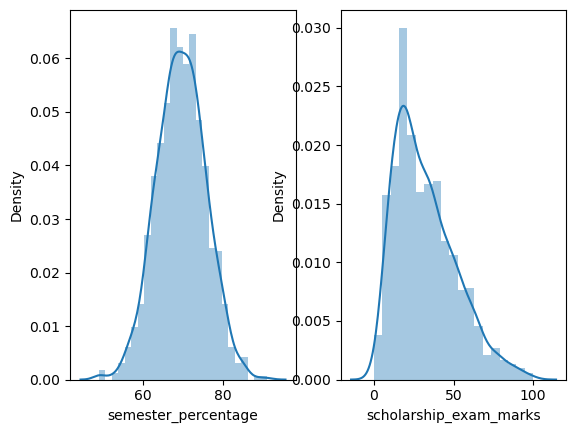

In [107]:
plt.subplot(1,2,1)
sns.distplot(data["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(data["scholarship_exam_marks"])
plt.show()

In [108]:
df = data.copy()

In [109]:
upper_limit = df["semester_percentage"].mean()+3*df["semester_percentage"].std()
print(upper_limit)

88.08933625397168


In [110]:
upper_limit = df["semester_percentage"].mean()-3*df["semester_percentage"].std()
print(upper_limit)

51.13546374602831


In [111]:
df[(df["semester_percentage"]>88.08) |(df["semester_percentage"]<51.13)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


# Triming the data

In [112]:
df[(df["semester_percentage"]<88.08) & (df["semester_percentage"]>51.13)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [113]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


# Now using Z-score to find the Outlier

In [114]:
df["Z_score"] = (df["semester_percentage"]-df["semester_percentage"].mean())/(df["semester_percentage"].std())

In [115]:
df[df["Z_score"]<-3]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
485,49.2,44,1,-3.314251
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [116]:
df[df["Z_score"]>3]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062


In [117]:
df[df["Z_score"]<-3]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
485,49.2,44,1,-3.314251
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [118]:
df[(df["Z_score"]>-3) & (df["Z_score"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


# Capping 

In [119]:
upper_limit = df['semester_percentage'].mean()+3*df['semester_percentage'].std()
print(upper_limit)

88.08933625397168


In [120]:
lower_limit = df['semester_percentage'].mean()-3*df['semester_percentage'].std()
print(lower_limit)


51.13546374602831


In [121]:
df['semester_percentage'] = np.where(df['semester_percentage']>upper_limit ,
                                     upper_limit ,np.where(df['semester_percentage']<lower_limit,lower_limit ,df['semester_percentage']))

In [122]:
df['semester_percentage']

0      71.900000
1      74.600000
2      75.400000
3      64.200000
4      72.300000
         ...    
995    88.089336
996    88.089336
997    51.135464
998    86.200000
999    51.135464
Name: semester_percentage, Length: 1000, dtype: float64

In [123]:
df[(df["semester_percentage"]>upper_limit) |(df["semester_percentage"]<lower_limit)]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score


# Working on outilers on IQR

<Axes: >

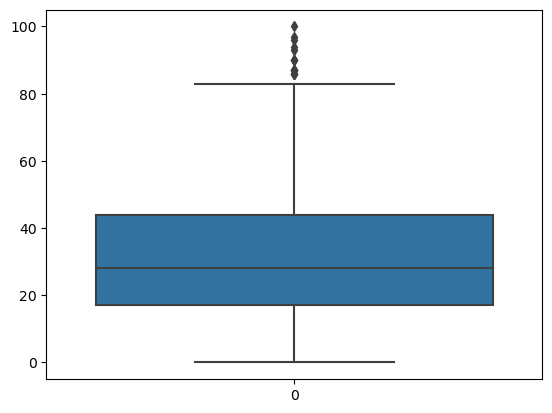

In [124]:
sns.boxplot(df['scholarship_exam_marks'])

In [125]:
df.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,69.614985,32.225000,0.489000,9.876544e-16
std,6.126884,19.130822,0.500129,1.000000e+00
min,51.135464,0.000000,0.000000,-3.362960e+00
25%,65.500000,17.000000,0.000000,-6.677081e-01
50%,69.600000,28.000000,0.000000,-2.013321e-03
75%,73.700000,44.000000,1.000000,6.636815e-01
max,88.089336,100.000000,1.000000,3.505062e+00


In [126]:
q1=17
q3=44

In [127]:
IQR = q3-q1

In [128]:
IQR

27

In [139]:
max = q3+3*IQR   
min = q1-3*IQR    #We set an IQR multiplier (iqr_multiplier) which determines how far from the quartiles the bounds will be placed.
#Commonly used values are 1.5 or 3.

In [140]:
max

125

In [141]:
min

-64

# Now triming the data

In [142]:
df[(df['scholarship_exam_marks']<max) & (df['scholarship_exam_marks']>min)]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
0,71.900000,26.0,1,0.371425
1,74.600000,38.0,1,0.809810
2,75.400000,40.0,1,0.939701
3,64.200000,8.0,1,-0.878782
4,72.300000,17.0,0,0.436371
...,...,...,...,...
995,88.089336,44.0,1,3.099150
996,88.089336,65.0,1,3.505062
997,51.135464,34.0,0,-3.362960
998,86.200000,46.0,1,2.693239


# Now capping the data....

In [143]:
df["scholarship_exam_marks"] = np.where(df["scholarship_exam_marks"]>max,
         max, 
         np.where(df["scholarship_exam_marks"]<min,min, df["scholarship_exam_marks"]))

In [144]:
df.shape

(1000, 4)

In [145]:
df['scholarship_exam_marks'] = np.where(df['scholarship_exam_marks']>max , max ,
                                        np.where(df['scholarship_exam_marks']<min , min,df['scholarship_exam_marks']))

In [146]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
0,71.900000,26.0,1,0.371425
1,74.600000,38.0,1,0.809810
2,75.400000,40.0,1,0.939701
3,64.200000,8.0,1,-0.878782
4,72.300000,17.0,0,0.436371
...,...,...,...,...
995,88.089336,44.0,1,3.099150
996,88.089336,65.0,1,3.505062
997,51.135464,34.0,0,-3.362960
998,86.200000,46.0,1,2.693239


<Axes: >

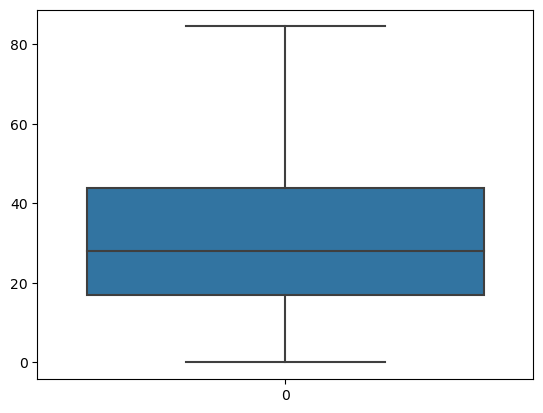

In [147]:
sns.boxplot(df['scholarship_exam_marks']) # checking the boxplot after elimanating the outliers...

In [148]:
 data = pd.read_csv("weight-height.csv")

In [149]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\tejan\AppData\Local\Temp\ipykernel_20308\3160361304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

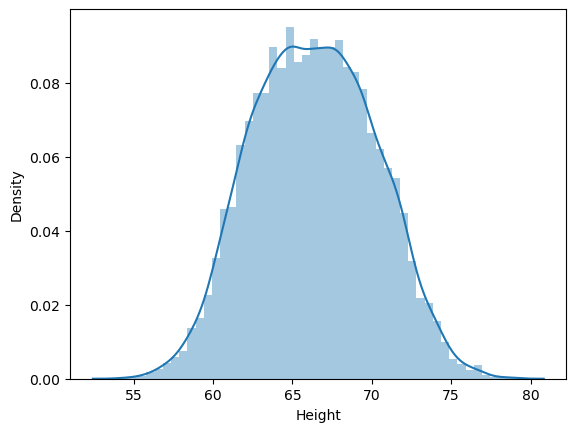

In [157]:
sns.distplot(data['Height'])



<Axes: >

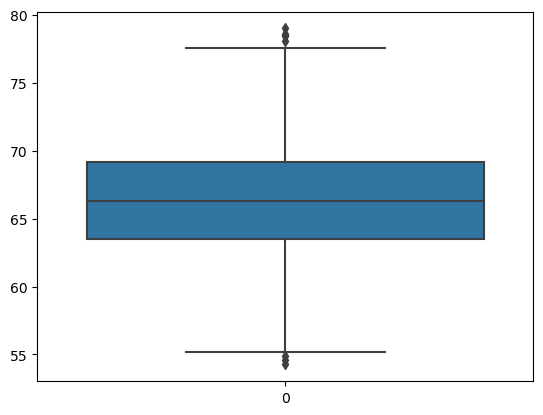

In [158]:
sns.boxplot(data['Height'])

# Working on Triming...

In [159]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [169]:
max = data['Height'].quantile(0.99)
min = data['Height'].quantile(0.01)

In [170]:
max

74.7857900583366

In [171]:
min

58.13441158671655

In [172]:
data[(data['Height']>max) | (data['Height']<min)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [175]:
 data1 = data[(data['Height']<max) & (data['Height']>min)]

In [176]:
data1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: >

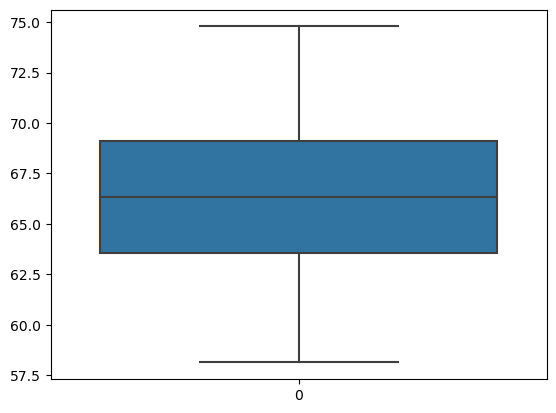

In [180]:
sns.boxplot(data1['Height'])

# Working on Capping...

In [182]:
data['Height'] = np.where(data['Height']>max , max , np.where(data['Height']<min , min ,data['Height']))

In [183]:
data.shape

(10000, 3)

<Axes: >

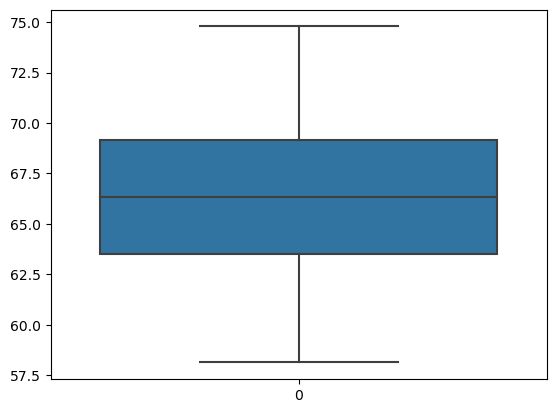

In [184]:
sns.boxplot(data['Height'])

In [185]:
data = pd.read_csv("AB_NYC_2019.csv")


In [186]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48901,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
48902,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
48903,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
48904,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48906 non-null  int64  
 1   name                            48890 non-null  object 
 2   host_id                         48906 non-null  int64  
 3   host_name                       48885 non-null  object 
 4   neighbourhood_group             48906 non-null  object 
 5   neighbourhood                   48906 non-null  object 
 6   latitude                        48906 non-null  float64
 7   longitude                       48906 non-null  float64
 8   room_type                       48906 non-null  object 
 9   price                           48906 non-null  int64  
 10  minimum_nights                  48906 non-null  int64  
 11  number_of_reviews               48906 non-null  int64  
 12  last_review                     

In [188]:
data['id'] = data['id'].astype('str')

In [189]:
data['id'].dtyp

dtype('O')

In [190]:
data['last_review'] = data['last_review'].astype('category')

In [191]:
data['last_review'].dtype

CategoricalDtype(categories=['01-01-2013', '01-01-2015', '01-01-2016', '01-01-2017',
                  '01-01-2018', '01-01-2019', '01-02-2014', '01-02-2016',
                  '01-02-2017', '01-02-2018',
                  ...
                  '31-10-2015', '31-10-2016', '31-10-2017', '31-10-2018',
                  '31-12-2012', '31-12-2014', '31-12-2015', '31-12-2016',
                  '31-12-2017', '31-12-2018'],
, ordered=False)

In [192]:
data['last_review'] = data['last_review'].astype('object')

In [193]:
data['last_review'].dtype

dtype('O')

In [194]:
data['id'] = data['id'].astype('int')

In [195]:
data['id'].dtype

dtype('int32')